In [1]:
#importing the libraaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset 
dataset = pd.read_csv('heart.csv')
dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
#checking if there are any duplicates in the data
dataset.duplicated().sum()

1

In [5]:
#dropping the duplicates
dataset.drop_duplicates(inplace=True)

In [6]:
#checking the summary of the dataset
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# univariate analysis

C:\Users\hp\AppData\Local\Temp\ipykernel_33700\2687241451.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[j], kde=False , color = 'blue')


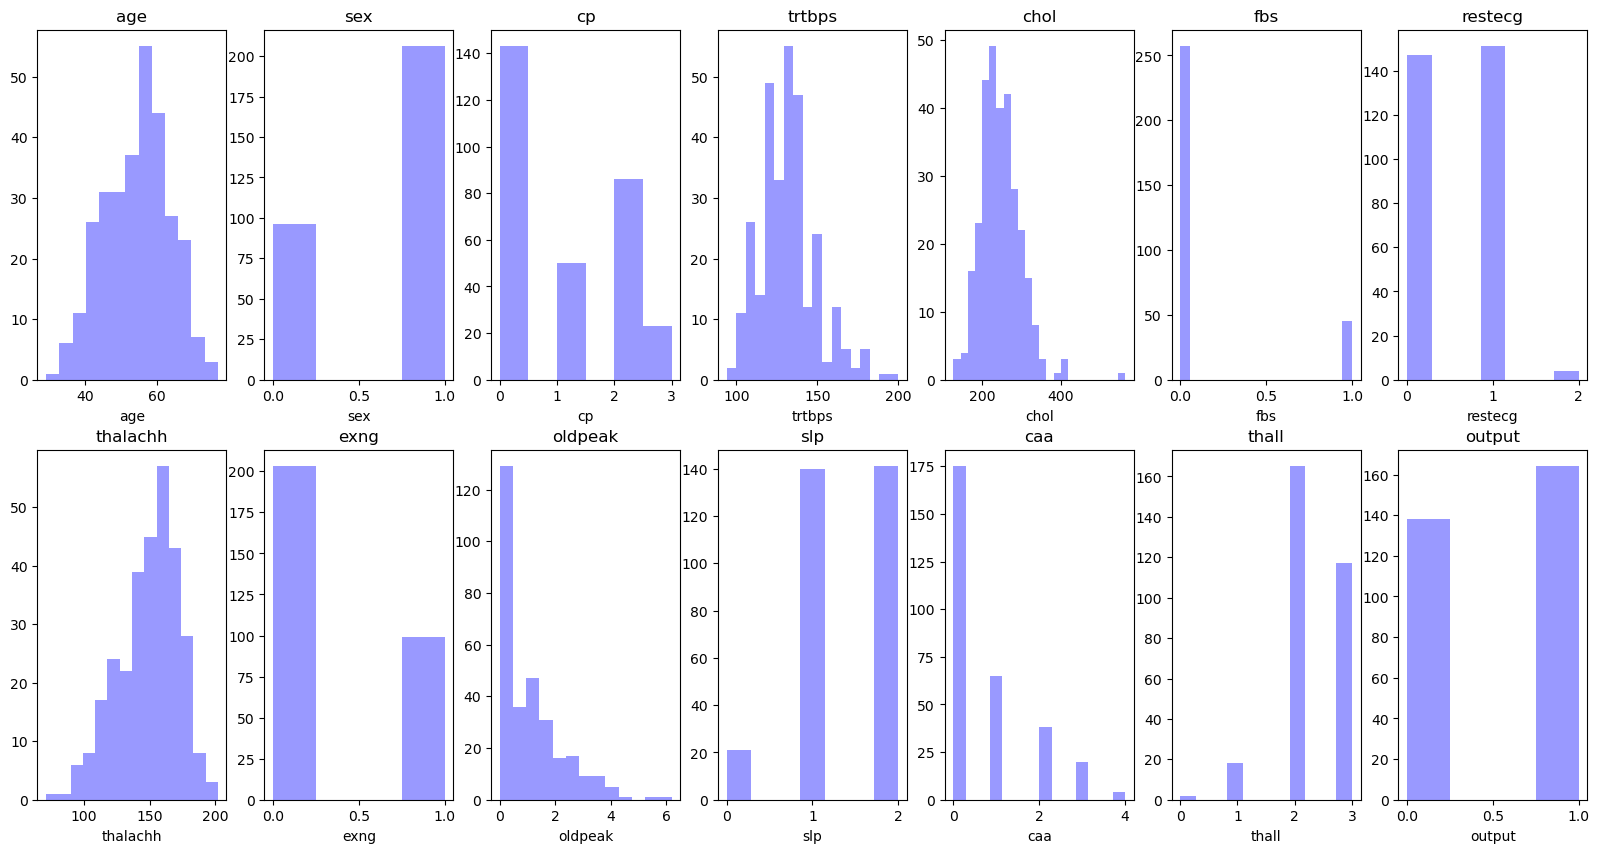

In [7]:
dataset_columns = dataset.columns

plt.figure(figsize = (20,10))
for i, j in enumerate(dataset_columns):
    plt.subplot(2 , 7 , i+1)
    sns.distplot(dataset[j], kde=False , color = 'blue')
    plt.title(j)

# Correlation Analysis

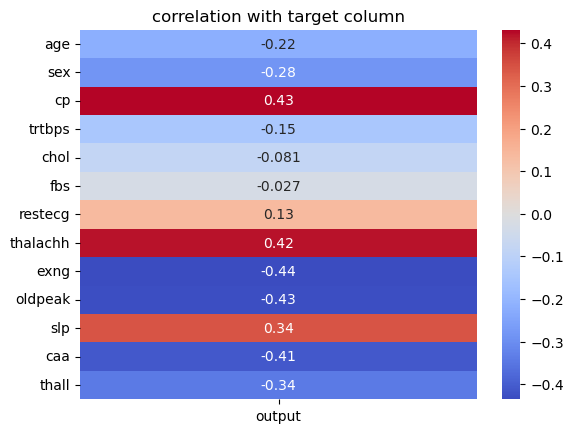

In [8]:
corr = dataset.corr()

target_corr = corr['output'].drop('output')
sns.heatmap(target_corr.to_frame(), cmap = 'coolwarm' , annot=True)
plt.title('correlation with target column')
plt.show()

In [35]:
corr['output'].drop('output')

age        -0.221476
sex        -0.283609
cp          0.432080
trtbps     -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalachh    0.419955
exng       -0.435601
oldpeak    -0.429146
slp         0.343940
caa        -0.408992
thall      -0.343101
Name: output, dtype: float64

# Modelling the dataset

In [9]:
dataset1 = dataset.copy()
X = dataset1.iloc[: , :-1].values
y = dataset1.iloc[: , -1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state=42)

In [11]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_lr = lr.fit(X_train , y_train)

In [13]:
lr_pred = lr.predict(X_test)
lr_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [14]:
from sklearn.metrics import confusion_matrix , accuracy_score
lr_confusion_matrix = confusion_matrix(y_test , lr_pred)
print(lr_confusion_matrix)
lr_accuracy =accuracy_score(y_test , lr_pred)
print(lr_accuracy)

[[24  5]
 [ 3 29]]
0.8688524590163934


# naive bayes

In [15]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(X_train , y_train)

GaussianNB()

In [16]:
naive_pred = model_naive.predict(X_test)
from sklearn.metrics import confusion_matrix , accuracy_score
naive_confusion_matrix = confusion_matrix(y_test , naive_pred)
print(naive_confusion_matrix)
naive_accuracy = accuracy_score(y_test , naive_pred)
print(naive_accuracy)

[[26  3]
 [ 4 28]]
0.8852459016393442


# Random_forest_classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators =20 , random_state= 42 , max_depth=5)
rf.fit(X_train , y_train)

RandomForestClassifier(max_depth=5, n_estimators=20, random_state=42)

In [18]:
rf_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix , accuracy_score
rf_confusion_matrix = confusion_matrix(y_test , rf_pred)
print(rf_confusion_matrix)
rf_accuracy = accuracy_score(y_test , rf_pred)
print(rf_accuracy)

[[25  4]
 [ 5 27]]
0.8524590163934426


# KNN classifier

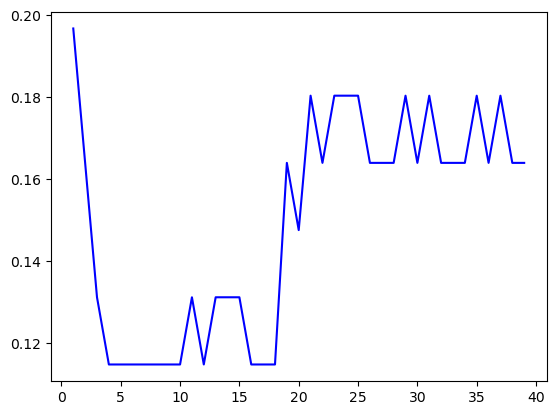

In [19]:
from sklearn.neighbors import KNeighborsClassifier
#knowing how many nearest neighbors to take at a time
error_rate = []
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train , y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.plot(range(1,40), error_rate , color ='blue')
plt.show()


In [20]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [21]:
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print(knn_conf_matrix)
print(knn_acc_score)

[[26  3]
 [ 4 28]]
0.8852459016393442


In [22]:
#classfication report
model_ev = pd.DataFrame({
    'Model': ['Logistic Regression' , 'naive bayes', 'random_forest', 'KNN'],
    'Accuracy': [lr_accuracy,naive_accuracy,rf_accuracy,knn_acc_score ]
})
model_ev

,Model,Accuracy
0,Logistic Regression,0.868852
1,naive bayes,0.885246
2,random_forest,0.852459
3,KNN,0.885246


# Best model is Naive bayes

In [23]:
#prediciting will a patient will have heart attack or not
input_data = pd.DataFrame({'age' : [27],
             'sex' : [1],
             'cp' : [2],
             'trtbps' : [120],
             'chol' : [0],
             'fbs' : [0],
             'restecg' : [1],
             'thalachh' : [172],
             'exng' : [0],
             'oldpeak' : [1.4],
             'slp' : [2],
             'caa' : [0],
             'thall' : [1],
             'output' : [0] })
input_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,27,1,2,120,0,0,1,172,0,1.4,2,0,1,0


In [24]:
last_data = pd.concat([dataset, input_data], axis=0)

In [25]:
last_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [26]:
last_data.reset_index()

,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
301,302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [27]:
prediction = model_naive.predict([[72 , 1 , 2 , 120 , 0 , 0 , 1 , 172 , 0 , 1.4 , 2 , 0 , 1]])

In [28]:
print(prediction)

[0]
